In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

## Load The Data

In [3]:
new_cust = pd.read_excel('../data/Raw_data.xlsx' , sheet_name='NewCustomerList')
new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [4]:
new_cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

The data-types of the feature columns are fine. However 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.

## Data Cleaning

In [5]:
print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


**Dividing into Numeric and Categorical Columns**

In [6]:
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


In [7]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)


**Missing Values Check**


In [8]:
print(new_cust.isnull().sum())

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64


In [9]:
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

 The updated DataFrame will include a new column called "full_name", which represents the merged first name and last name for each customer. If the last name is missing, the full name will consist only of the first name.

This approach ensures that we have a comprehensive representation of each customer's name, even in cases where the last name is unavailable. 

In [10]:
new_cust['last_name'] = new_cust['last_name'].fillna('')
new_cust['full_name'] = new_cust['first_name'] + ' ' + new_cust['last_name']
new_cust.drop(columns=['first_name', 'last_name'], inplace=True)
new_cust['full_name'].head()

0      Chickie Brister
1         Morly Genery
2    Ardelis Forrester
3         Lucine Stutt
4       Melinda Hadlee
Name: full_name, dtype: object

**Working with DOB**

In [11]:
new_cust[new_cust['DOB'].isnull()]


,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,full_name
59,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000,Normy Goodinge
226,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500,Hatti Carletti
324,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000,Rozamond Turtle
358,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000,Tamas Swatman
360,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500,Tracy Andrejevic
374,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000,Agneta McAmish
434,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250,Gregg Aimeric
439,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125,Johna Bunker
574,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875,Harlene Nono
598,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000,Gerianne Kaysor


In [12]:
dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [13]:
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)
new_cust['DOB'].isnull().sum()


0

**Creating Age Column for checking further descripency in data**

In [16]:
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])


In [17]:
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['Age'] = new_cust['DOB'].apply(age)

In [18]:
new_cust['Age'].describe()


count    983.000000
mean      52.367243
std       17.062555
min       22.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: Age, dtype: float64

The analysis reveals that the age distribution in the dataset is centered around the mean age of approximately 52 years, with a moderate degree of variability as indicated by the standard deviation. The age distribution ranges from 22 to 85 years, with the majority of individuals falling within the interquartile range (25th to 75th percentile). The median age of 51 years suggests that half of the individuals in the dataset are aged 51 years or younger.

This information provides valuable insights into the demographic characteristics of the individuals in the dataset, which can be further analyzed and utilized for various purposes such as customer segmentation, targeted marketing, or demographic profiling.

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_9660\2772827867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

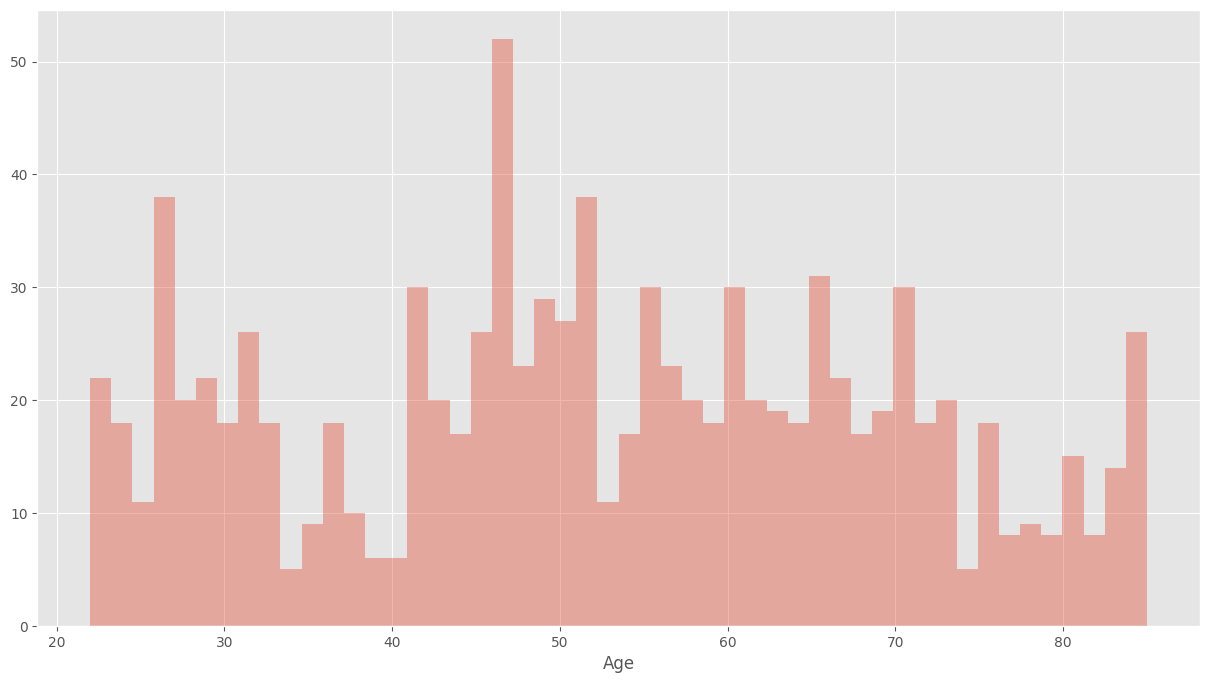

In [19]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_cust['Age'], kde=False, bins=50)

**Creating Age Group Column**

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_9660\3982676134.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age Group'], kde=False, bins=50)


<Axes: xlabel='Age Group'>

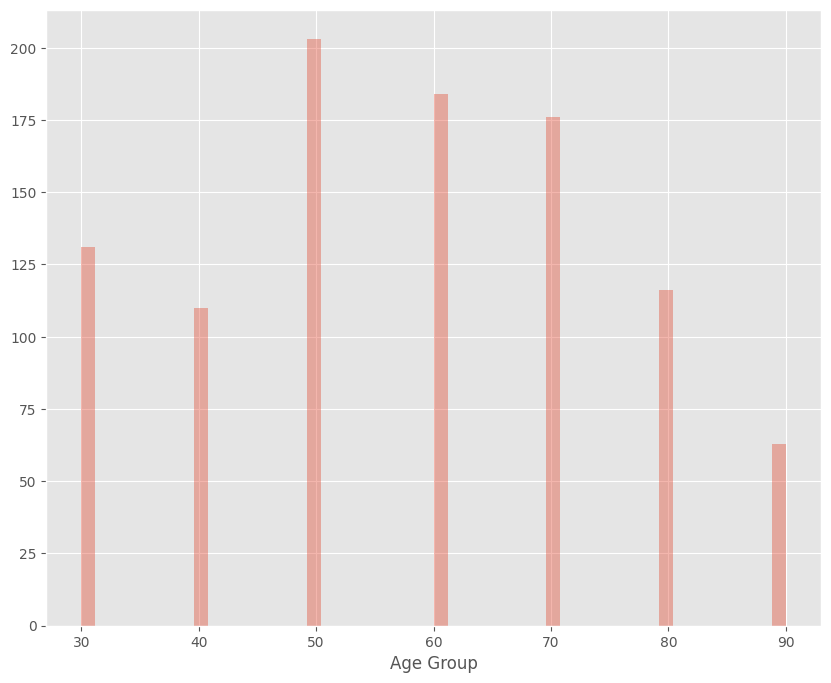

In [21]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=50)

The highest number of New Customers are from the Age Group 50-59.



**Job Title**

In [22]:
new_cust[new_cust['job_title'].isnull()]


,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,full_name,Age,Age Group
15,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,Dukie Swire,69,70
25,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,Rourke Gillbard,78,80
29,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,Rhona De Freyne,63,70
30,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,Sharron Claibourn,44,50
37,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,Mitchell MacCague,44,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,Candy,46,50
953,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,Noami Cokly,61,70
971,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,Frieda Tavinor,24,30
972,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,Ellwood Budden,25,30


Since percentage of missing values for Job Title is 11%. We will replace null values with Missing.

In [23]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)
new_cust['job_title'].isnull().sum()

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_9660\32909438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_cust['job_title'].fillna('Missing', inplace=True, axis=0)


0

***Job Industry Category***

In [24]:
new_cust[new_cust['job_industry_category'].isnull()]


,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,full_name,Age,Age Group
22,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,Otis Ottey,26,30
23,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,Tabbatha Averill,46,50
33,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,Mikel McNess,42,50
36,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,Farlie Petford,55,60
43,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,Corinna Suggey,57,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,Blondell Dibdall,57,60
971,Female,43,1999-03-04,Missing,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,Frieda Tavinor,24,30
975,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,Amby Bodega,55,60
980,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,Tyne Anshell,31,40


Since Percentage of missing Job Industry Category is 16%. We will replace null values with Missing.

In [25]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)
new_cust['job_industry_category'].isnull().sum()

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_9660\2192371841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)


0

Currently there are no Missing values for Job Industry Category column.

Finally there are no Missing Values in the dataset.


In [26]:
new_cust.isnull().sum()


gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
full_name                              0
Age                                    0
Age Group                              0
dtype: int64

In [27]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))


Total records after removing Missing Values: 983


**Inconsistency Check in Data**

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

In [28]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

In [29]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [30]:
new_cust['deceased_indicator'].value_counts()


deceased_indicator
N    983
Name: count, dtype: int64

In [31]:
new_cust['owns_car'].value_counts()


owns_car
No     497
Yes    486
Name: count, dtype: int64

In [32]:
new_cust['state'].value_counts()


state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [33]:
new_cust['country'].value_counts()


country
Australia    983
Name: count, dtype: int64

In [34]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')


,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


In [35]:
new_cust[['address', 'postcode','state','country']].sort_values('address')


,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


In [36]:
new_cust['tenure'].describe()


count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_9660\3980029841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

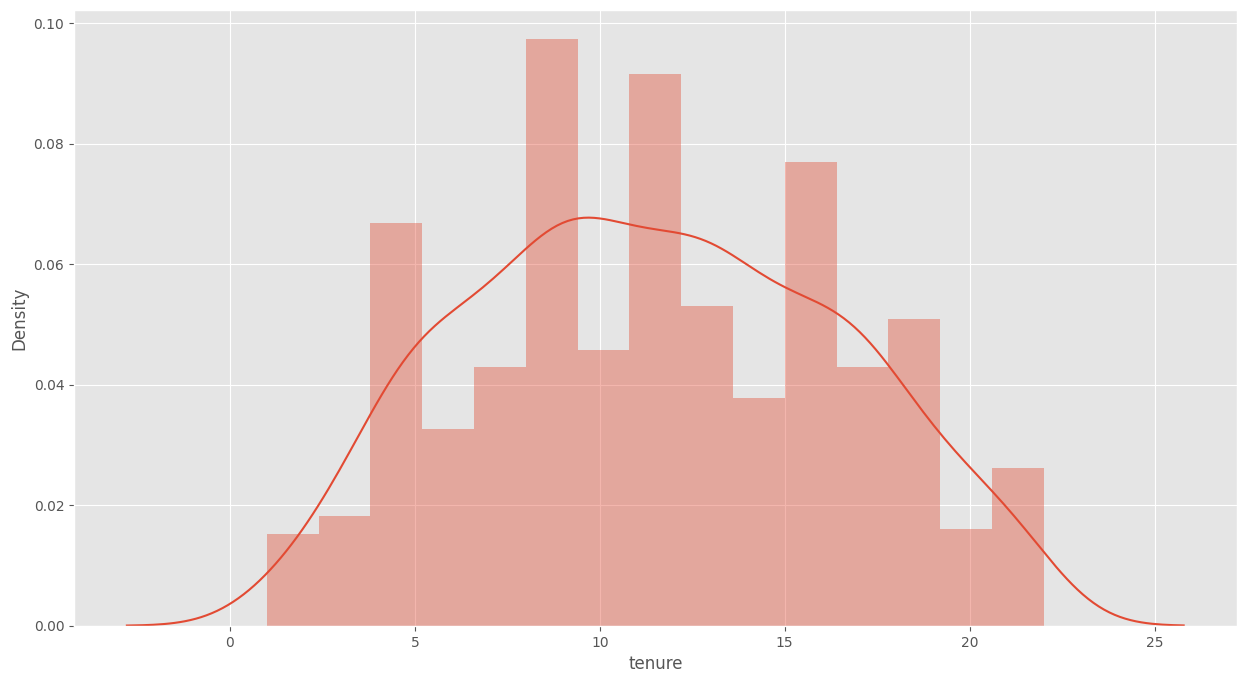

In [37]:
plt.figure(figsize=(15,8))
sns.distplot(new_cust['tenure'])

**Duplication Checks**

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [38]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


## Exporting the Cleaned New Customers Data Set to csv

In [ ]:
new_cust.to_csv('../data/NewCustomerList.csv', index=False)